## Author : Riyaz Khan

In [2]:
import pandas as pd
import numpy as np
from numpy import int64

In [3]:
df=pd.read_excel('/Users/riyazkhan/Downloads/BD12_all.xlsx')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df.head(5)

,Buoy ID,Observation Time,Latitude,Longitude,Air Temperature,Air Pressure,Wind Direction,Wind Gust,Wind Speed,Humidity,...,Current Speed_080m,Current Speed_085m,Current Speed_090m,Current Speed_095m,Current Speed_100m,Current Speed_105m,Irradiance,Radiation,Pressure_500m,Unnamed: 78
0,NaN,UTC,dd,dd,degC,hpa,deg,m/s,m/s,%,...,cm/s,cm/s,cm/s,cm/s,cm/s,cm/s,w/m2,w/m2,bar,NaN
1,BD12,2016-03-20 00:00:00,10.486908,94.027771,39.998474,1010.552979,348.39844,4.10156,2.59766,119.88281,...,5.56641,5.05371,5.63965,10.54688,12.08496,13.69629,0,468.403625,50.291748,NaN
2,BD12,2016-03-20 01:00:00,10.486908,94.027771,39.998474,1011.322021,335.03906,4.58008,3.48633,119.88281,...,6.51855,8.71582,13.18359,16.77246,18.01758,19.33594,63.47656,470.684814,50.405273,NaN
3,BD12,2016-03-20 02:00:00,10.486908,94.027771,39.998474,1011.981201,326.60156,4.44336,2.87109,119.88281,...,15.23438,17.06543,17.06543,23.87695,23.4375,20.50781,373.53516,476.834106,50.524292,NaN
4,BD12,2016-03-20 03:00:00,10.487061,94.031738,39.998474,1012.347412,323.78906,3.41797,2.46094,119.88281,...,4.6875,9.30176,13.47656,16.25977,12.59766,12.6709,625,485.006714,50.449219,NaN


We will remove the first row

In [6]:
df1 = df.drop(labels=None, axis=0, index=0, columns=None, level=None, inplace=False, errors='raise')

In [7]:
df1['Observation Time'] = pd.to_datetime(df1['Observation Time'])

we have converted Observation Time column from object to date time so that we can convert hourly data into daily data

In [8]:
df1.dtypes

Buoy ID                       object
Observation Time      datetime64[ns]
Latitude                      object
Longitude                     object
Air Temperature               object
                           ...      
Current Speed_105m            object
Irradiance                    object
Radiation                     object
Pressure_500m                 object
Unnamed: 78                  float64
Length: 79, dtype: object

we will remove columns which do not have any data.

In [9]:
df1.drop(['Salinity_050m','Salinity_075m','Salinity_100m','Water Temperature_050m','Water Temperature_075m','Water Temperature_100m'],axis=1)

,Buoy ID,Observation Time,Latitude,Longitude,Air Temperature,Air Pressure,Wind Direction,Wind Gust,Wind Speed,Humidity,...,Current Speed_080m,Current Speed_085m,Current Speed_090m,Current Speed_095m,Current Speed_100m,Current Speed_105m,Irradiance,Radiation,Pressure_500m,Unnamed: 78
1,BD12,2016-03-20 00:00:00,10.486908,94.027771,39.998474,1010.552979,348.39844,4.10156,2.59766,119.88281,...,5.56641,5.05371,5.63965,10.54688,12.08496,13.69629,0,468.403625,50.291748,NaN
2,BD12,2016-03-20 01:00:00,10.486908,94.027771,39.998474,1011.322021,335.03906,4.58008,3.48633,119.88281,...,6.51855,8.71582,13.18359,16.77246,18.01758,19.33594,63.47656,470.684814,50.405273,NaN
3,BD12,2016-03-20 02:00:00,10.486908,94.027771,39.998474,1011.981201,326.60156,4.44336,2.87109,119.88281,...,15.23438,17.06543,17.06543,23.87695,23.4375,20.50781,373.53516,476.834106,50.524292,NaN
4,BD12,2016-03-20 03:00:00,10.487061,94.031738,39.998474,1012.347412,323.78906,3.41797,2.46094,119.88281,...,4.6875,9.30176,13.47656,16.25977,12.59766,12.6709,625,485.006714,50.449219,NaN
5,BD12,2016-03-20 04:00:00,10.486908,94.031891,39.998474,1012.512207,336.09375,3.62305,2.46094,119.88281,...,2.19727,5.34668,8.78906,6.81152,6.00586,3.51563,825.68359,489.450073,50.046387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15644,BD12,2017-12-31 19:00:00,10.462036,94.007935,27.93945,1009.472656,91.75781,7.45117,5.67383,76.4063,...,32.37305,16.11328,9.30176,7.10449,19.11621,35.00977,3.41797,900.976563,47.41333,NaN
15645,BD12,2017-12-31 20:00:00,10.462036,94.007935,27.81738,1008.612061,68.55469,7.24609,5.19531,76.4063,...,35.88867,25.63477,29.95605,35.00977,43.13965,45.26367,4.39453,925.752258,46.821899,NaN
15646,BD12,2017-12-31 21:00:00,10.458527,94.00473,26.9873,1007.897949,71.71875,9.16016,6.01563,82.0313,...,50.31738,57.42188,50.31738,35.15625,19.40918,8.20313,3.41797,885.424805,47.596436,NaN
15647,BD12,2017-12-31 22:00:00,10.458374,94.00473,27.89063,1007.678223,81.91406,10.45898,7.65625,75.4688,...,23.73047,26.7334,20.72754,14.79492,22.41211,18.75,3.41797,895.422363,48.061523,NaN


In [10]:
df1

,Buoy ID,Observation Time,Latitude,Longitude,Air Temperature,Air Pressure,Wind Direction,Wind Gust,Wind Speed,Humidity,...,Current Speed_080m,Current Speed_085m,Current Speed_090m,Current Speed_095m,Current Speed_100m,Current Speed_105m,Irradiance,Radiation,Pressure_500m,Unnamed: 78
1,BD12,2016-03-20 00:00:00,10.486908,94.027771,39.998474,1010.552979,348.39844,4.10156,2.59766,119.88281,...,5.56641,5.05371,5.63965,10.54688,12.08496,13.69629,0,468.403625,50.291748,NaN
2,BD12,2016-03-20 01:00:00,10.486908,94.027771,39.998474,1011.322021,335.03906,4.58008,3.48633,119.88281,...,6.51855,8.71582,13.18359,16.77246,18.01758,19.33594,63.47656,470.684814,50.405273,NaN
3,BD12,2016-03-20 02:00:00,10.486908,94.027771,39.998474,1011.981201,326.60156,4.44336,2.87109,119.88281,...,15.23438,17.06543,17.06543,23.87695,23.4375,20.50781,373.53516,476.834106,50.524292,NaN
4,BD12,2016-03-20 03:00:00,10.487061,94.031738,39.998474,1012.347412,323.78906,3.41797,2.46094,119.88281,...,4.6875,9.30176,13.47656,16.25977,12.59766,12.6709,625,485.006714,50.449219,NaN
5,BD12,2016-03-20 04:00:00,10.486908,94.031891,39.998474,1012.512207,336.09375,3.62305,2.46094,119.88281,...,2.19727,5.34668,8.78906,6.81152,6.00586,3.51563,825.68359,489.450073,50.046387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15644,BD12,2017-12-31 19:00:00,10.462036,94.007935,27.93945,1009.472656,91.75781,7.45117,5.67383,76.4063,...,32.37305,16.11328,9.30176,7.10449,19.11621,35.00977,3.41797,900.976563,47.41333,NaN
15645,BD12,2017-12-31 20:00:00,10.462036,94.007935,27.81738,1008.612061,68.55469,7.24609,5.19531,76.4063,...,35.88867,25.63477,29.95605,35.00977,43.13965,45.26367,4.39453,925.752258,46.821899,NaN
15646,BD12,2017-12-31 21:00:00,10.458527,94.00473,26.9873,1007.897949,71.71875,9.16016,6.01563,82.0313,...,50.31738,57.42188,50.31738,35.15625,19.40918,8.20313,3.41797,885.424805,47.596436,NaN
15647,BD12,2017-12-31 22:00:00,10.458374,94.00473,27.89063,1007.678223,81.91406,10.45898,7.65625,75.4688,...,23.73047,26.7334,20.72754,14.79492,22.41211,18.75,3.41797,895.422363,48.061523,NaN


We will now set Observation Time as index. It will be needed to convert hourly data into monthly data.

In [11]:
df1.set_index('Observation Time',inplace=True)

In [12]:
df1

,Buoy ID,Latitude,Longitude,Air Temperature,Air Pressure,Wind Direction,Wind Gust,Wind Speed,Humidity,rainfall,...,Current Speed_080m,Current Speed_085m,Current Speed_090m,Current Speed_095m,Current Speed_100m,Current Speed_105m,Irradiance,Radiation,Pressure_500m,Unnamed: 78
Observation Time,,,,,,,,,,,,,,,,,,,,,
2016-03-20 00:00:00,BD12,10.486908,94.027771,39.998474,1010.552979,348.39844,4.10156,2.59766,119.88281,38.96484,...,5.56641,5.05371,5.63965,10.54688,12.08496,13.69629,0,468.403625,50.291748,NaN
2016-03-20 01:00:00,BD12,10.486908,94.027771,39.998474,1011.322021,335.03906,4.58008,3.48633,119.88281,38.90625,...,6.51855,8.71582,13.18359,16.77246,18.01758,19.33594,63.47656,470.684814,50.405273,NaN
2016-03-20 02:00:00,BD12,10.486908,94.027771,39.998474,1011.981201,326.60156,4.44336,2.87109,119.88281,38.78906,...,15.23438,17.06543,17.06543,23.87695,23.4375,20.50781,373.53516,476.834106,50.524292,NaN
2016-03-20 03:00:00,BD12,10.487061,94.031738,39.998474,1012.347412,323.78906,3.41797,2.46094,119.88281,38.73047,...,4.6875,9.30176,13.47656,16.25977,12.59766,12.6709,625,485.006714,50.449219,NaN
2016-03-20 04:00:00,BD12,10.486908,94.031891,39.998474,1012.512207,336.09375,3.62305,2.46094,119.88281,38.67188,...,2.19727,5.34668,8.78906,6.81152,6.00586,3.51563,825.68359,489.450073,50.046387,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,BD12,10.462036,94.007935,27.93945,1009.472656,91.75781,7.45117,5.67383,76.4063,41.07422,...,32.37305,16.11328,9.30176,7.10449,19.11621,35.00977,3.41797,900.976563,47.41333,NaN
2017-12-31 20:00:00,BD12,10.462036,94.007935,27.81738,1008.612061,68.55469,7.24609,5.19531,76.4063,41.25,...,35.88867,25.63477,29.95605,35.00977,43.13965,45.26367,4.39453,925.752258,46.821899,NaN
2017-12-31 21:00:00,BD12,10.458527,94.00473,26.9873,1007.897949,71.71875,9.16016,6.01563,82.0313,41.19141,...,50.31738,57.42188,50.31738,35.15625,19.40918,8.20313,3.41797,885.424805,47.596436,NaN


we will now convet object to float 64 as columns have numbers in decimals.

In [29]:
# object to float 64
df1[[
'Latitude',
'Longitude',
'Air Temperature',
'Air Pressure',
'Wind Direction',
'Wind Gust',
'Wind Speed',
'Humidity',
'rainfall',
'Salinity_1m',
'Salinity_005m',
'Salinity_010m',
'Salinity_015m',
'Salinity_020m',
'Salinity_030m',
'Salinity_200m',
'Salinity_500m',
'Water Temperature',
'Water Temperature_005m',
'Water Temperature_010m',
'Water Temperature_015m',
'Water Temperature_020m',
'Water Temperature_030m',
'Water Temperature_200m',
'Water Temperature_500m',
'Current Direction',
'Current Direction_010m',
'Current Direction_015m',
'Current Direction_020m',
'Current Direction_025m',
'Current Direction_030m',
'Current Direction_035m',
'Current Direction_040m',
'Current Direction_045m',
'Current Direction_050m',
'Current Direction_055m',
'Current Direction_060m',
'Current Direction_065m',
'Current Direction_070m',
'Current Direction_075m',
'Current Direction_080m',
'Current Direction_085m',
'Current Direction_090m',
'Current Direction_095m',
'Current Direction_100m',
'Current Direction_105m',
'Current Speed 1.2',
'Current Speed_010m',
'Current Speed_015m',
'Current Speed_020m',
'Current Speed_025m',
'Current Speed_030m',
'Current Speed_035m',
'Current Speed_040m',
'Current Speed_045m',
'Current Speed_050m',
'Current Speed_055m',
'Current Speed_060m',
'Current Speed_065m',
'Current Speed_070m',
'Current Speed_075m',
'Current Speed_080m',
'Current Speed_085m',
'Current Speed_090m',
'Current Speed_095m',
'Current Speed_100m',
'Current Speed_105m',
'Irradiance',
'Radiation',
'Pressure_500m']]=df1[['Latitude',
'Longitude',
'Air Temperature',
'Air Pressure',
'Wind Direction',
'Wind Gust',
'Wind Speed',
'Humidity',
'rainfall',
'Salinity_1m',
'Salinity_005m',
'Salinity_010m',
'Salinity_015m',
'Salinity_020m',
'Salinity_030m',
'Salinity_200m',
'Salinity_500m',
'Water Temperature',
'Water Temperature_005m',
'Water Temperature_010m',
'Water Temperature_015m',
'Water Temperature_020m',
'Water Temperature_030m',
'Water Temperature_200m',
'Water Temperature_500m',
'Current Direction',
'Current Direction_010m',
'Current Direction_015m',
'Current Direction_020m',
'Current Direction_025m',
'Current Direction_030m',
'Current Direction_035m',
'Current Direction_040m',
'Current Direction_045m',
'Current Direction_050m',
'Current Direction_055m',
'Current Direction_060m',
'Current Direction_065m',
'Current Direction_070m',
'Current Direction_075m',
'Current Direction_080m',
'Current Direction_085m',
'Current Direction_090m',
'Current Direction_095m',
'Current Direction_100m',
'Current Direction_105m',
'Current Speed 1.2',
'Current Speed_010m',
'Current Speed_015m',
'Current Speed_020m',
'Current Speed_025m',
'Current Speed_030m',
'Current Speed_035m',
'Current Speed_040m',
'Current Speed_045m',
'Current Speed_050m',
'Current Speed_055m',
'Current Speed_060m',
'Current Speed_065m',
'Current Speed_070m',
'Current Speed_075m',
'Current Speed_080m',
'Current Speed_085m',
'Current Speed_090m',
'Current Speed_095m',
'Current Speed_100m',
'Current Speed_105m',
'Irradiance',
'Radiation',
'Pressure_500m']].astype('float64')

In [23]:
df1.shape

(15648, 78)

In [30]:
#converting hourly data into daily data by taking mean

df2= df1.resample('D').mean()

In [31]:
df2.shape

(652, 71)

In [32]:
df2.head()

,Latitude,Longitude,Air Temperature,Air Pressure,Wind Direction,Wind Gust,Wind Speed,Humidity,rainfall,Salinity_1m,...,Current Speed_080m,Current Speed_085m,Current Speed_090m,Current Speed_095m,Current Speed_100m,Current Speed_105m,Irradiance,Radiation,Pressure_500m,Unnamed: 78
Observation Time,,,,,,,,,,,,,,,,,,,,,
2016-03-20,10.484301,94.030473,39.998474,1010.808563,327.128907,3.252767,2.187500,119.88281,38.659669,32.013600,...,12.133789,11.199952,10.809326,12.054443,15.762329,18.676758,265.421549,484.910838,49.786606,NaN
2016-03-21,10.484289,94.029901,39.998474,1010.406494,301.508790,2.762860,1.731771,119.88281,38.300782,32.321950,...,17.660523,18.154908,19.647217,20.675660,20.675660,18.881226,238.708496,482.664362,49.790573,NaN
2016-03-22,10.482260,94.032120,39.998474,1010.050201,285.468750,2.492270,1.253256,119.88281,38.166505,32.358325,...,19.384766,19.863892,18.228151,18.508910,21.545410,21.264649,229.064941,489.744314,49.038467,NaN
2016-03-23,10.482375,94.026989,39.998474,1011.647797,210.292971,2.016601,0.962728,119.88281,38.066407,32.049017,...,22.186279,22.311402,23.156738,24.365235,24.224853,25.317382,271.443685,488.974826,49.253540,NaN
2016-03-24,10.480690,94.022697,39.998474,1011.949921,21.855469,6.981202,5.297852,119.88281,37.829590,31.897179,...,20.877075,21.160888,21.047973,20.205687,19.876098,18.829346,273.783366,487.552389,47.876358,NaN


## Plots

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='Observation Time', ylabel='Air Pressure'>

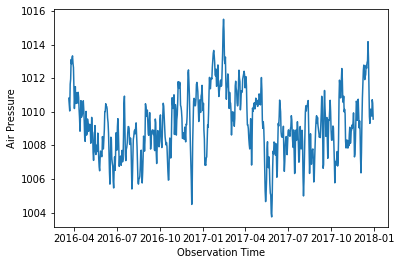

In [34]:
sns.lineplot(x='Observation Time', y= 'Air Pressure', data=df2)

<AxesSubplot:xlabel='Observation Time', ylabel='Air Temperature'>

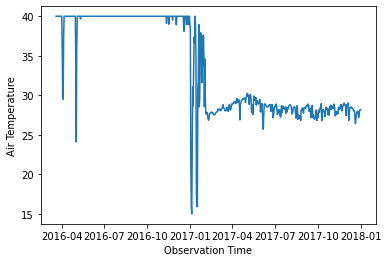

In [35]:
sns.lineplot(x='Observation Time', y= 'Air Temperature', data=df2)

<AxesSubplot:xlabel='Observation Time', ylabel='Wind Gust'>

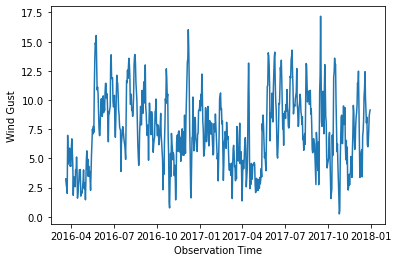

In [37]:
sns.lineplot(x='Observation Time', y= 'Wind Gust', data=df2)

<AxesSubplot:xlabel='Observation Time', ylabel='Wind Speed'>

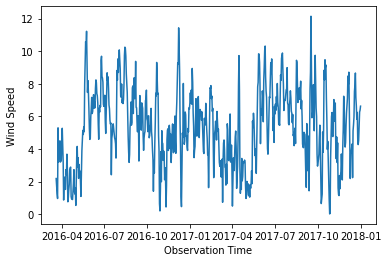

In [38]:
sns.lineplot(x='Observation Time', y= 'Wind Speed', data=df2)

<AxesSubplot:xlabel='Observation Time', ylabel='Humidity'>

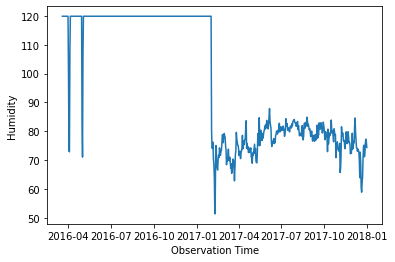

In [39]:
sns.lineplot(x='Observation Time', y= 'Humidity', data=df2)

<AxesSubplot:xlabel='Observation Time', ylabel='rainfall'>

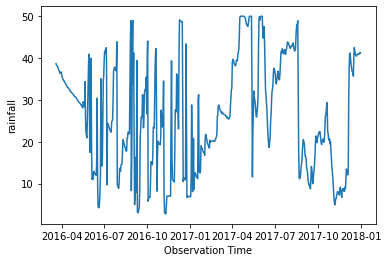

In [40]:
sns.lineplot(x='Observation Time', y= 'rainfall', data=df2)